In [1]:
import autograd.numpy as np
import pyipopt
from autograd import grad, hessian, jacobian

In [3]:
import matplotlib.pyplot as plt
from counterfactual_functions import *
from helper import *

username='boraozaltun'

data_dict = load_obj('/Users/'+username+'/Dropbox (MIT)/Data/Trade/general_equilibrium_gravity/final_data/data_subset_20200304.pickle')

reg_2_num = load_obj('/Users/'+username+'/Dropbox (MIT)/Data/Trade/general_equilibrium_gravity/GTAP/mapping/reg_2_num.pickle')
comm_2_num = load_obj('/Users/'+username+'/Dropbox (MIT)/Data/Trade/general_equilibrium_gravity/GTAP/mapping/comm_2_num.pickle')

n = data_dict['n']
g = data_dict['g']
k = data_dict['k']

data_dict['R_hat'] = np.ones((n, g))
X_0 = np.ones(n*g + n)*1.0

eval_f = lambda x: np.sum(reduced_counterfactual(x, data_dict)**2) # Norm of residuals


eval_grad_f = grad(eval_f)

In [16]:
C_goods = ['farm', 'food', 'coa', 'oil','gas', 'oxd']

F_goods = ['man','bus','oxd','trans','util']
num_2_reg = reverse_dict(reg_2_num)

In [67]:
df_temp = pd.DataFrame(data_dict['phi_L_k'].T)
df_temp.set_index(pd.Series(F_goods), inplace=True)
df_temp.rename(columns=num_2_reg, inplace=True)

In [68]:
fig, ax = plt.subplots(figsize=(40, 8))
ax = sns.heatmap(df_temp)

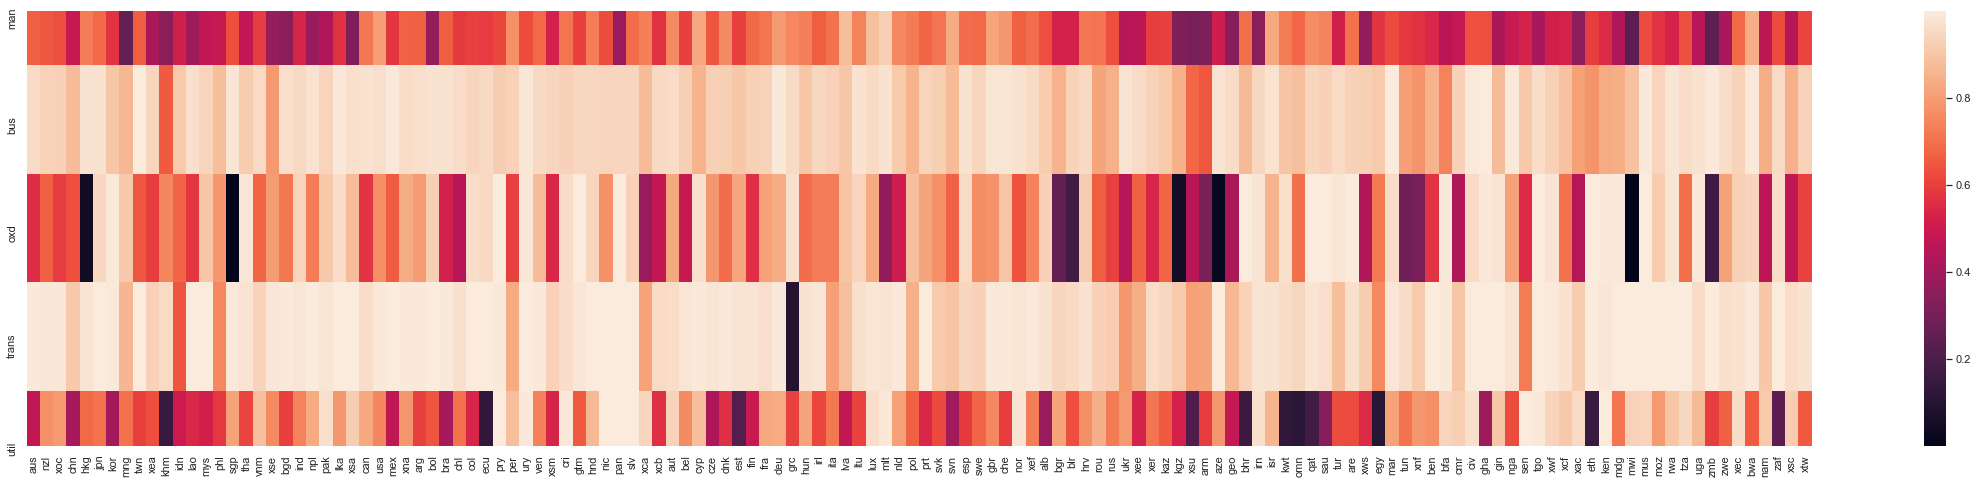

In [69]:
plt.show()

In [ ]:
data_dict